# Применение математической статистики для проверки гипотез в реальной жизни для популярных метрик



Математическая статистика 
это раздел математики, в котором разрабатываются различные методы для описания и анализа наблюдений с цель использования для научных и практических выводов.

Математическая статистика - фундамент A/B тестов, без правильного понимания которого резко возрастает риск принятия неверных решений в продукте. И в этом мы ни раз убедимся в рамках курса.


## Описательные статистики


### Типы данных:

1. Количественные
- Непрерывные (средний чек , таймспент итд)
- Дискретные ( число детей, число мотоциклов итд)

2. Качественные

- номинативные (пол , названия групп, именна итд)
- ранговые ( оценка в  психологическом исследовании  , оценка асессора итд )


Независимые выборки – это те выборки, в которых вероятность отбора любого респондента одной выборки не зависит от отбора любого из респондентов другой выборки.
>Пример: рандомно взятые новые пользователи


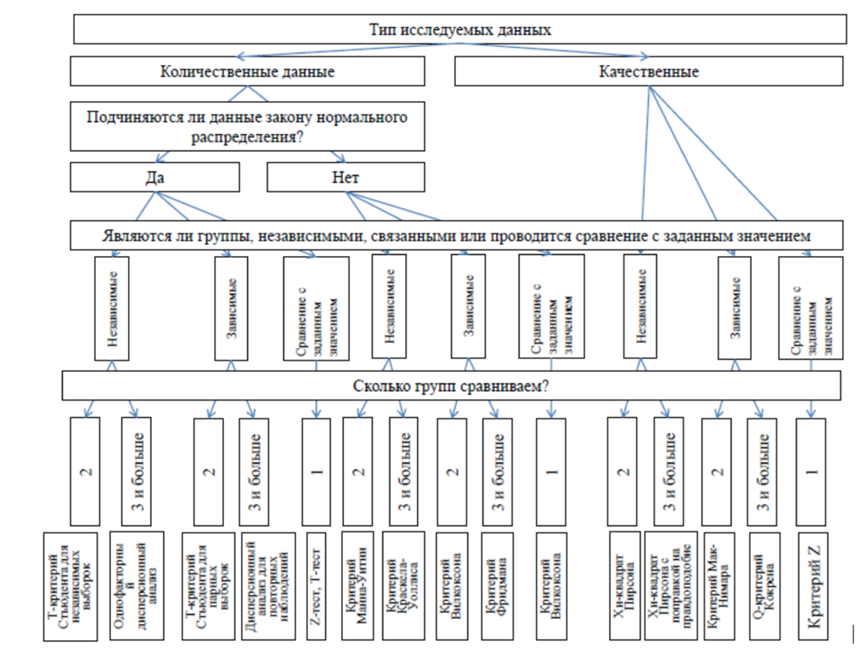

### Выбор критерия (light version)
- Конверсии ([Хи-квадрат на однородность](https://www.evanmiller.org/ab-testing/chi-squared.html#!14/100;20/100@95) распределения в двух ген совокупностях или [Z критерий долей](https://abtestguide.com/calc/))

- Средние 

если нормальное распределение то [t критерий](https://www.evanmiller.org/ab-testing/t-test.html)

если не нормальное распределение то [критерий Манна-Уитни](https://ccb-compute2.cs.uni-saarland.de/wtest/)



## Практическое задание 1:

Мы запустили АБ-тест на увеличение среднего дохода за сеанс. По итогам тестирования мы получили следующие данные. Является ли результат статистически значимым с уровнем доверия 95%? Какую версию мы выкатим в продакшн?

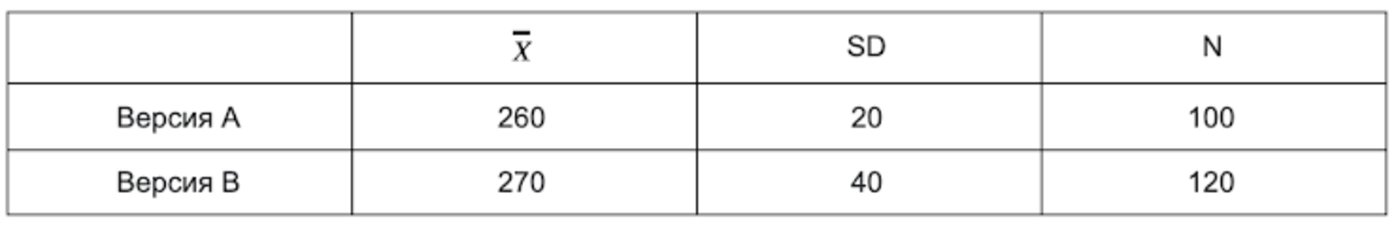



Односторонний тест:

H0: muB <= muA или $E_B - E_A \leq 0$

H1: muB > muA или $E_B - E_A > 0$ - левосторонний тест 

t-value:

$$t = \frac{\overline{x_1}-\overline{x_2}}{\sqrt{\frac{{s_1}^2}{n_1}+\frac{{s_2}^2}{n_2}}}$$

From your mailing list link:

>because the one-sided tests can be backed out from the two-sided tests. (With symmetric distributions one-sided p-value is just half of the two-sided pvalue)

It goes on to say that scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, you would reject the null hypothesis of a greater-than test when ***p/2 < alpha and t > 0***, and of a less-than test when ***p/2 < alpha and t < 0***.

In [1]:
import numpy as np
from scipy import stats
import math

In [2]:
EvA = 260
EvB = 270
SDA = 20
SDB = 40
lenA = 100
lenB = 120
EvA, EvB, SDA, SDB, lenA, lenB

(260, 270, 20, 40, 100, 120)

In [65]:
vA = np.random.normal(EvA, SDA, lenA)
vB = np.random.normal(EvB, SDB, lenB)

vA, vB

(array([270.53438318, 260.06219589, 261.95465788, 259.51487243,
        254.38211187, 245.00266545, 224.86252123, 242.96409966,
        242.06203356, 219.3341322 , 247.67979936, 228.81987165,
        258.75771861, 255.90223526, 268.66544917, 261.62150991,
        268.74377079, 249.07021903, 273.95344046, 245.9677756 ,
        244.87795338, 247.42083791, 264.78053879, 245.89656088,
        273.64169359, 247.83766462, 277.84336502, 253.43085373,
        256.62887989, 244.12531898, 273.19857836, 247.2120331 ,
        234.88471898, 263.52240226, 246.24111697, 283.4431106 ,
        259.87795494, 252.54412934, 275.88508092, 266.36610351,
        280.62464318, 253.70459251, 255.568774  , 276.20387609,
        255.08205889, 277.91144235, 266.9921057 , 272.64582266,
        254.92424693, 267.61953383, 258.6189733 , 304.99549525,
        273.39809988, 302.53468915, 273.24391853, 238.61002499,
        298.76220637, 263.51577194, 277.12741674, 285.89579431,
        247.50391306, 231.97877876, 242.

#### Двусторонний тест:

In [66]:
t, p = stats.ttest_ind(vB, vA)
t, p

(1.8231865353219412, 0.06964472308227648)

In [48]:
alpha = 0.05
t_cr_1 = stats.t.ppf(alpha, df=(lenA + lenB - 2))
t_cr_2 = stats.t.ppf(1 - alpha, df=(lenA + lenB - 2))
t_cr_1, t_cr_2

(-1.651873372668681, 1.6518733726686803)

In [52]:
t_value = (EvB-EvA)/math.sqrt((SDA**2)/lenA + (SDB**2)/lenB)
t_value

2.4019223070763065

Нулевую гипотезу отвергаем, так как $p-value < \alpha$, и t-value не попадает в интервал. Значит, есть статистические различия между вариантами А и Б. Рекомендуем следовать варианту Б.

#### Односторонний тест:

In [58]:
t_value = (EvB-EvA)/math.sqrt((SDA**2)/lenA + (SDB**2)/lenB)
t_value # t наблюдаемое

2.4019223070763065

In [59]:
alpha = 0.05
t_cr = stats.t.ppf(1 - alpha, df=((lenA + lenB)/2 - 1))

t_cr # t критическое

1.6589534581903567

In [70]:
p_value = stats.t.sf(t_value, df=((lenA + lenB)/2 - 1))
p_value

0.009000167865197447

In [71]:
p_value/2

0.004500083932598723

In [75]:
p_value/2 < alpha

True

#### Так как тестовое значение больше критического, а $\frac{p-value}{2} < \alpha$, то нулевая гипотеза может быть отвергнута. Значит, в выборке B среднее значение действительно больше, чем в выборке А.
Рекомендуем Версию B.

## Практическое задание 2:
Мы провели АБ-тест на увеличение ARPU. По итогам тестирования мы получили следующие данные. Является ли результат статистически значимым с уровнем доверия 95%? Какую версию мы выкатим в продакшн ?
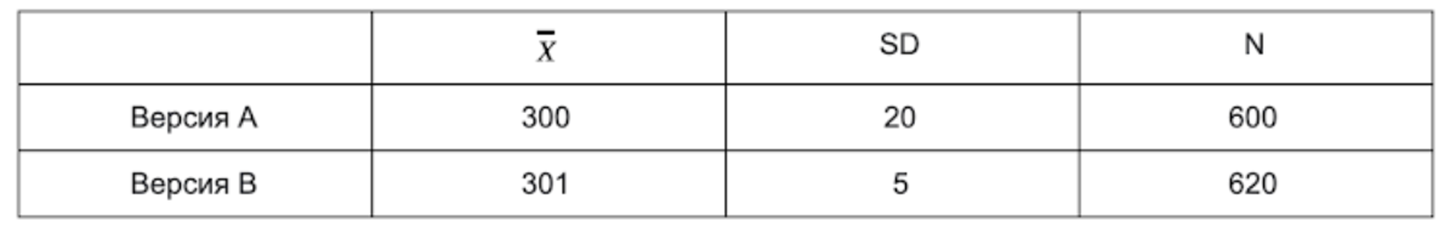

In [72]:
EvA2 = 300
EvB2 = 301
SDA2 = 20
SDB2 = 5
lenA2 = 600
lenB2 = 620
EvA2, EvB2, SDA2, SDB2, lenA2, lenB2

(300, 301, 20, 5, 600, 620)

In [73]:
t_value2 = (EvB2-EvA2)/np.sqrt(SDA2**2/lenA2 + SDB2**2/lenB2)
t_value2 # t наблюдаемое

1.1893059611393197

In [74]:
alpha2 = 0.05
t_cr2 = stats.t.ppf(1 - alpha2, df=((lenA2 + lenB2)/2 - 1))

t_cr2 # t критическое

1.6473595445615652

In [76]:
p_value2 = stats.t.sf(t_value2, df=((lenA2 + lenB2)/2 - 1))
p_value2

0.11739138939039782

In [77]:
p_value2/2 < alpha2

False

#### Так как тестовое значение меньше критического, а $\frac{p-value}{2} > \alpha$, то нулевая гипотеза не может быть отвергнута. Значит, в выборке B среднее значение может быть равно или меньше значению в выборке А.
Порекомендуем обе версии (нужны дополнительные данные для принятия решения - стоимость и сложность внедрения изменения, имидж-фактор)

## Практическое задание 3:

Мы провели АБ-тест на увеличение average timespent  per user. По итогам тестирования мы получили следующие данные. Является ли результат статистически значимым с уровнем доверия 95%? Какую версию мы выкатим на продакшн?
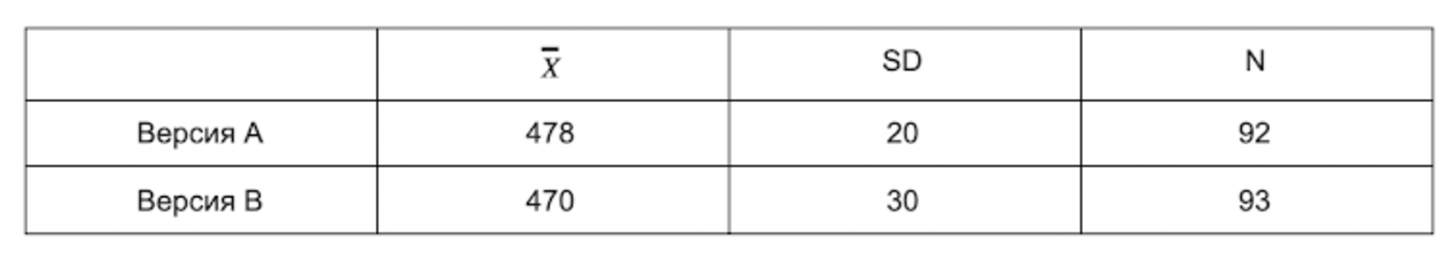

In [78]:
EvA3 = 478
EvB3 = 470
SDA3 = 20
SDB3 = 30
lenA3 = 92
lenB3 = 93
EvA3, EvB3, SDA3, SDB3, lenA3, lenB3

(478, 470, 20, 30, 92, 93)

In [79]:
t_value3 = (EvB3-EvA3)/np.sqrt(SDA3**2/lenA3 + SDB3**2/lenB3)
t_value3 # t наблюдаемое

-2.13616478765099

In [80]:
alpha3 = 0.05
t_cr3_1 = stats.t.ppf(alpha3, df=(lenA3 + lenB3 - 2))
t_cr3_2 = stats.t.ppf(1 - alpha3, df=(lenA3 + lenB3 - 2))

t_cr3_1, t_cr3_2 # t критическое

(-1.6532228031447718, 1.653222803144771)

In [81]:
p_value3 = stats.t.sf(t_value3, df=(lenA3 + lenB3 - 2))
p_value3

0.9830025737435991

## Практическое задание 4:

Укажите, как соотносятся между собой медиана и среднее арифметическое для следующих величин. И кратко расскажите, почему вы так думаете.

- Рост взрослых женщин(старше 18 лет) в России
>Распределение близко к нормальному, выбросов почти нет. Поэтому медиана и среднее будет равно.

- Зарплата людей, работающих в системе здравоохранения в России
>Больше количество людей, работающих на более низких должностях. Среднее значительно выше, чем медиана.

- Время на юзера в день, которое люди проводят в VK
>Примерно нормальное распределение, если учитывать только активных пользователей. Поэтому примерно совпадает среднее значение и медиана.


## Практическое задание 5:

Вычислите  выборочную дисперсию, выборочное  среднее, стандартное отклонение, моду и медиану для следующего множества значений:

[5, 5, 5, 18, 10, 8, 9, 10, 19, 21 ]


In [82]:
x5 = np.array([5, 5, 5, 18, 10, 8, 9, 10, 19, 21 ])
x5

array([ 5,  5,  5, 18, 10,  8,  9, 10, 19, 21])

In [83]:
x5.mean() # выборочное среднее

11.0

In [97]:
np.var(x5, ddof=1) # выборочная дисперсия

37.333333333333336

In [98]:
math.sqrt(x5.var()) # стандартное отклонение СМЕЩЕННОЕ

5.796550698475776

In [99]:
np.std(x5, ddof=1) # несмещенное

6.110100926607787

In [106]:
stats.mode(x5, keepdims=True)

ModeResult(mode=array([5]), count=array([3]))

In [94]:
np.median(x5)

9.5

## Практическое задание 6:

Постройте 95% доверительный интервал для  конверсии = 11% с выборкой 1500 человек.

Напишите кратко, как вы будете интерпретировать результат.

Доверительный интервал: $$E = z \cdot \sqrt{\frac{p \cdot (1-p)}{n}}$$
где p - базовая конверсия, n - количество в выборке, z - количество сигм (2 для 95%, 3 для 99.8%)


In [108]:
p6 = 0.11
n6 = 1500
e6 = 2 * np.sqrt((p6*(1-p6))/n6)
p6-e6, p6+e6

(0.09384244242879924, 0.12615755757120076)